# Credit Card Fraud Detection using R Language

## Data Preprocessing

### Task 1: Import Packages

In [2]:
# Import modules
library(ranger)
library(ggplot2)
library(caret)
library(data.table)
library(caTools)
library(pROC)
library(rpart)

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




### Task 2: Load the Data

In [3]:
# Load the data from file
df = read.csv("data.csv")
head(df)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,...,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
2,0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,...,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
3,1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,...,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
4,1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,...,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
5,2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,...,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
6,2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,...,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


### Task 3: Explore the Data

In [4]:
# Print names
names(df)

[1] "Time"   "V1"     "V2"     "V3"     "V4"     "V5"     "V6"     "V7"    
 [9] "V8"     "V9"     "V10"    "V11"    "V12"    "V13"    "V14"    "V15"   
[17] "V16"    "V17"    "V18"    "V19"    "V20"    "V21"    "V22"    "V23"   
[25] "V24"    "V25"    "V26"    "V27"    "V28"    "Amount" "Class"

In [5]:
# Frequency of Class
table(df$Class)


     0      1 
284315    492 

In [6]:
# Summary of Data
summary(df)

      Time              V1                  V2                  V3          
 Min.   :     0   Min.   :-56.40751   Min.   :-72.71573   Min.   :-48.3256  
 1st Qu.: 54202   1st Qu.: -0.92037   1st Qu.: -0.59855   1st Qu.: -0.8904  
 Median : 84692   Median :  0.01811   Median :  0.06549   Median :  0.1799  
 Mean   : 94814   Mean   :  0.00000   Mean   :  0.00000   Mean   :  0.0000  
 3rd Qu.:139320   3rd Qu.:  1.31564   3rd Qu.:  0.80372   3rd Qu.:  1.0272  
 Max.   :172792   Max.   :  2.45493   Max.   : 22.05773   Max.   :  9.3826  
       V4                 V5                   V6                 V7          
 Min.   :-5.68317   Min.   :-113.74331   Min.   :-26.1605   Min.   :-43.5572  
 1st Qu.:-0.84864   1st Qu.:  -0.69160   1st Qu.: -0.7683   1st Qu.: -0.5541  
 Median :-0.01985   Median :  -0.05434   Median : -0.2742   Median :  0.0401  
 Mean   : 0.00000   Mean   :   0.00000   Mean   :  0.0000   Mean   :  0.0000  
 3rd Qu.: 0.74334   3rd Qu.:   0.61193   3rd Qu.:  0.3986   3rd Qu

In [7]:
# Variance
var(df)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,2.255124e+09,1.091960e+04,-8.307031e+02,-3.021425e+04,-7.077378e+03,1.134407e+04,-3.986868e+03,4.976739e+03,-2.095683e+03,-4.518322e+02,...,1.560435e+03,4.964595e+03,1.516599e+03,-4.654076e+02,-5.769855e+03,-9.482254e+02,-9.841860e+01,-1.475443e+02,-1.258610e+05,-2.430072e+01
V1,1.091960e+04,3.836489e+00,-2.252859e-16,-1.689642e-15,-7.218405e-16,8.507676e-16,3.895661e-16,1.900133e-16,-1.274057e-16,8.205568e-17,...,-1.333924e-16,1.366183e-16,2.150126e-16,-6.117795e-17,-2.440886e-16,-1.194074e-16,7.635321e-17,2.379182e-16,-1.115566e+02,-8.243501e-03
V2,-8.307031e+02,-2.252859e-16,2.726820e+00,1.303832e-16,-3.771750e-16,2.550723e-16,8.515163e-16,-2.671272e-16,-4.854199e-17,-2.037673e-16,...,9.751430e-17,2.038445e-16,1.388705e-16,-1.071148e-16,9.960072e-17,2.086951e-16,-3.510702e-16,-2.061314e-16,-2.194854e+02,6.260047e-03
V3,-3.021425e+04,-1.689642e-15,1.303832e-16,2.299029e+00,-4.786833e-16,-1.258796e-15,2.883053e-15,4.309333e-16,-1.332219e-16,1.727645e-16,...,-1.773224e-16,-2.484192e-16,-7.274665e-17,2.320459e-17,9.057523e-17,-1.582370e-16,3.211700e-16,3.667878e-16,-7.997555e+01,-1.214993e-02
V4,-7.077378e+03,-7.218405e-16,-3.771750e-16,-4.786833e-16,2.004684e+00,-3.598732e-15,-8.012118e-16,-1.300357e-16,1.083182e-15,9.265182e-16,...,-6.162585e-17,2.437101e-16,1.768691e-16,1.377378e-16,4.777561e-16,-2.758970e-16,-6.052138e-17,-1.618588e-18,3.496456e+01,7.846318e-03
V5,1.134407e+04,8.507676e-16,2.550723e-16,-1.258796e-15,-3.598732e-15,1.905081e+00,1.152389e-15,-3.435134e-17,8.506424e-16,7.362875e-16,...,-7.306904e-17,2.282538e-17,9.502623e-17,-8.116721e-16,-7.617748e-17,2.254551e-16,2.521873e-16,-8.092792e-17,-1.333808e+02,-5.443715e-03
V6,-3.986868e+03,3.895661e-16,8.515163e-16,2.883053e-15,-8.012118e-16,1.152389e-15,1.774946e+00,-8.208691e-17,-5.513429e-16,-1.422819e-16,...,-8.472255e-17,-1.115206e-16,2.898917e-17,-8.664171e-16,3.852132e-16,-1.632157e-16,-7.462679e-17,1.900254e-16,7.197093e+01,-2.414579e-03
V7,4.976739e+03,1.900133e-16,-2.671272e-16,4.309333e-16,-1.300357e-16,-3.435134e-17,-8.208691e-17,1.530401e+00,-1.804052e-17,1.030418e-17,...,8.943471e-18,-5.925295e-16,-2.040827e-16,-5.253881e-18,1.200475e-17,-4.672891e-16,-9.271429e-17,3.351842e-17,1.229368e+02,-9.619937e-03
V8,-2.095683e+03,-1.274057e-16,-4.854199e-17,-1.332219e-16,1.083182e-15,8.506424e-16,-5.513429e-16,-1.804052e-17,1.426479e+00,5.556472e-16,...,2.356113e-17,2.183488e-17,1.431071e-16,-1.530564e-16,-9.762763e-17,1.207445e-18,1.544168e-16,-2.289846e-16,-3.079299e+01,9.857688e-04
V9,-4.518322e+02,8.205568e-17,-2.037673e-16,1.727645e-16,9.265182e-16,7.362875e-16,-1.422819e-16,1.030418e-17,5.556472e-16,1.206992e+00,...,1.914119e-16,-1.368106e-16,-6.157983e-17,-1.874972e-16,1.390826e-16,-5.067926e-17,-7.673486e-17,2.887134e-16,-1.215825e+01,-4.458868e-03


In [8]:
# Number of rows
nrow(df)

[1] 284807

### Task 4: Manipulate the Data

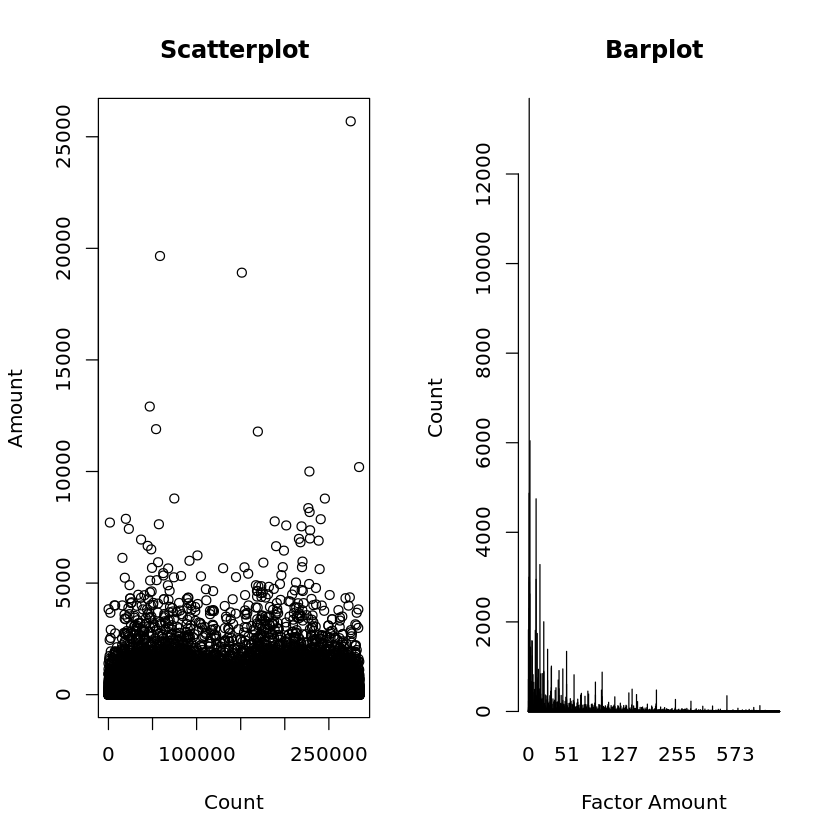

In [9]:
# View the plots
par(mfrow = c(1, 2))
x = 1:nrow(df)
y = df$Amount
my_factor = factor(df$Amount)
# Scatterplot
plot(x, y, main = "Scatterplot",  xlab="Count", ylab="Amount")
# Barplot
plot(my_factor, main = "Barplot", xlab="Factor Amount", ylab="Count")

In [10]:
# Scale the data
df$Amount = scale(df$Amount)
data = df[,-c(1)]

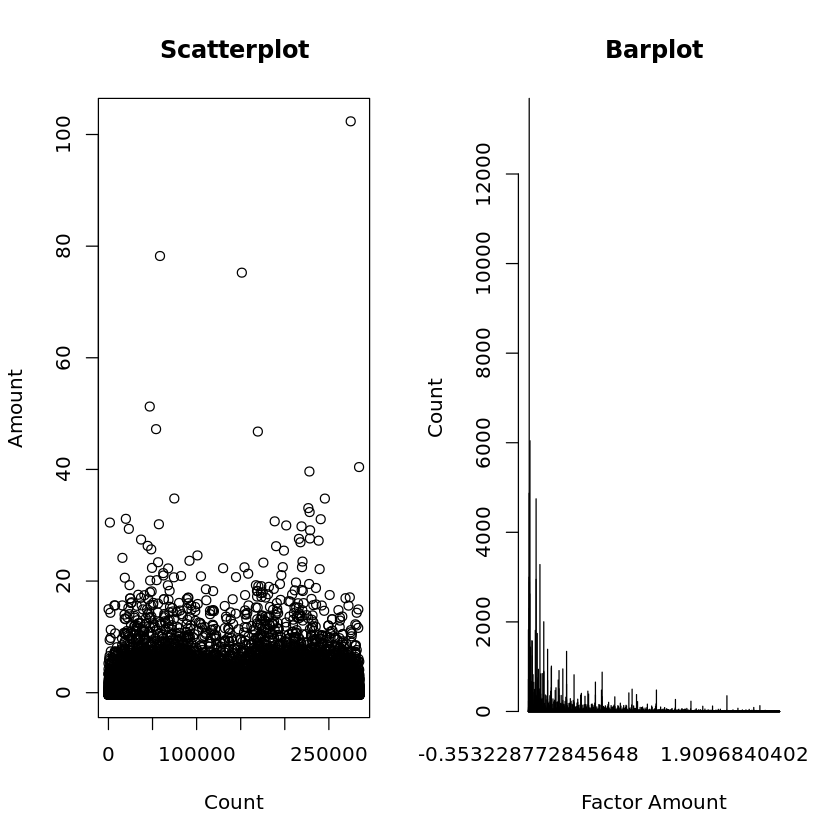

In [11]:
# View plots to verify the scalling
par(mfrow = c(1, 2))
y = data$Amount
my_factor <- factor(data$Amount)
# Scatterplot
plot(x, y, main = "Scatterplot",  xlab="Count", ylab="Amount")
# Barplot
plot(my_factor, main = "Barplot", xlab="Factor Amount", ylab="Count")

### Task 5: Split the Data

In [12]:
# Split the Data
set.seed(123)
data_sample = sample.split(data$Class, SplitRatio=0.80)
data.train_data = subset(data, data_sample==TRUE)
data.test_data = subset(data, data_sample==FALSE)

In [13]:
# Verify the splits
nrow(data.train_data)
nrow(data.test_data)

[1] 227846

[1] 56961

## Logistic Regression

### Task 6: Fit the Logistic Regression

In [14]:
# Fit the model
model = glm(Class~., data.train_data, family=binomial())


In [15]:
# Summary of model
summary(model)


Call:
glm(formula = Class ~ ., family = binomial(), data = data.train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.6108  -0.0292  -0.0194  -0.0125   4.6021  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.651305   0.160212 -53.999  < 2e-16 ***
V1           0.072540   0.044144   1.643 0.100332    
V2           0.014818   0.059777   0.248 0.804220    
V3           0.026109   0.049776   0.525 0.599906    
V4           0.681286   0.078071   8.726  < 2e-16 ***
V5           0.087938   0.071553   1.229 0.219079    
V6          -0.148083   0.085192  -1.738 0.082170 .  
V7          -0.117344   0.068940  -1.702 0.088731 .  
V8          -0.146045   0.035667  -4.095 4.23e-05 ***
V9          -0.339828   0.117595  -2.890 0.003855 ** 
V10         -0.785462   0.098486  -7.975 1.52e-15 ***
V11          0.001492   0.085147   0.018 0.986018    
V12          0.087106   0.094869   0.918 0.358532    
V13         -0.343792   0.092381  -3.7

### Task 7: Plot the Logistic Regression

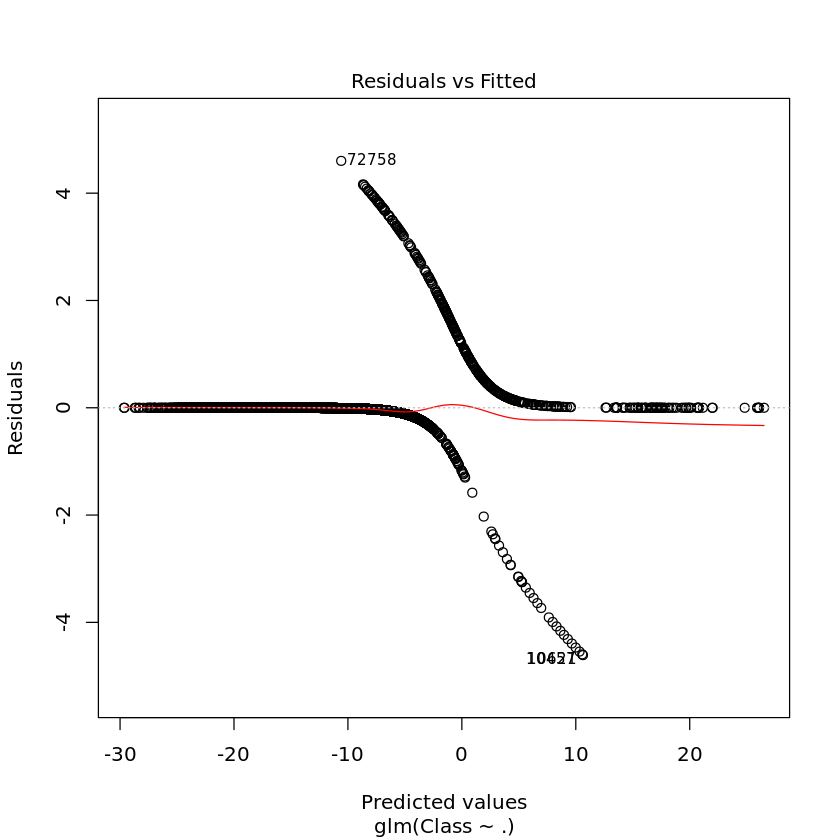

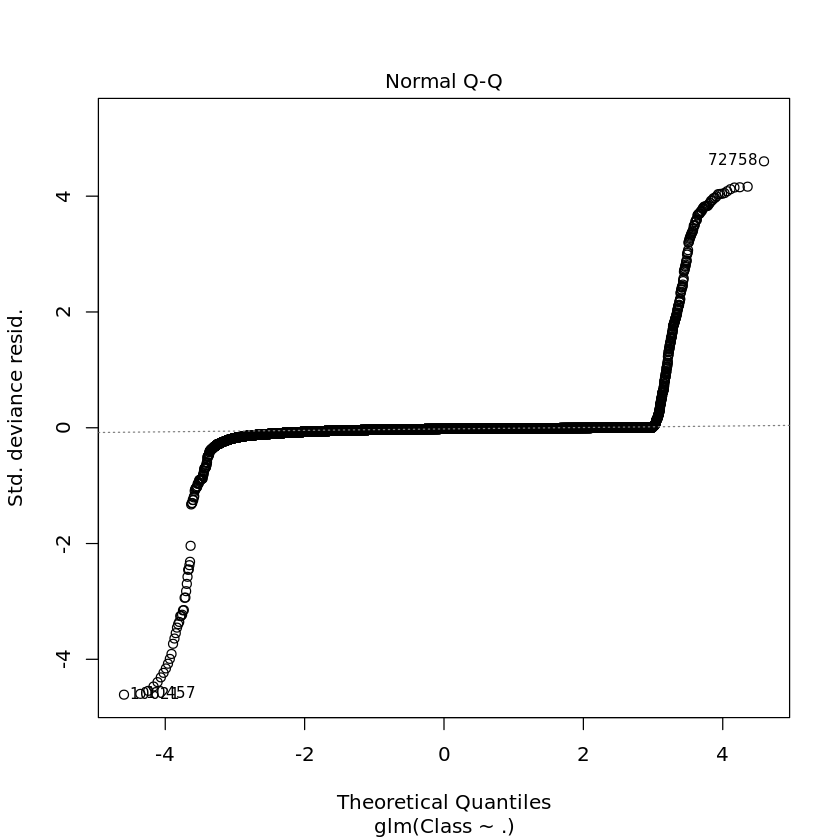

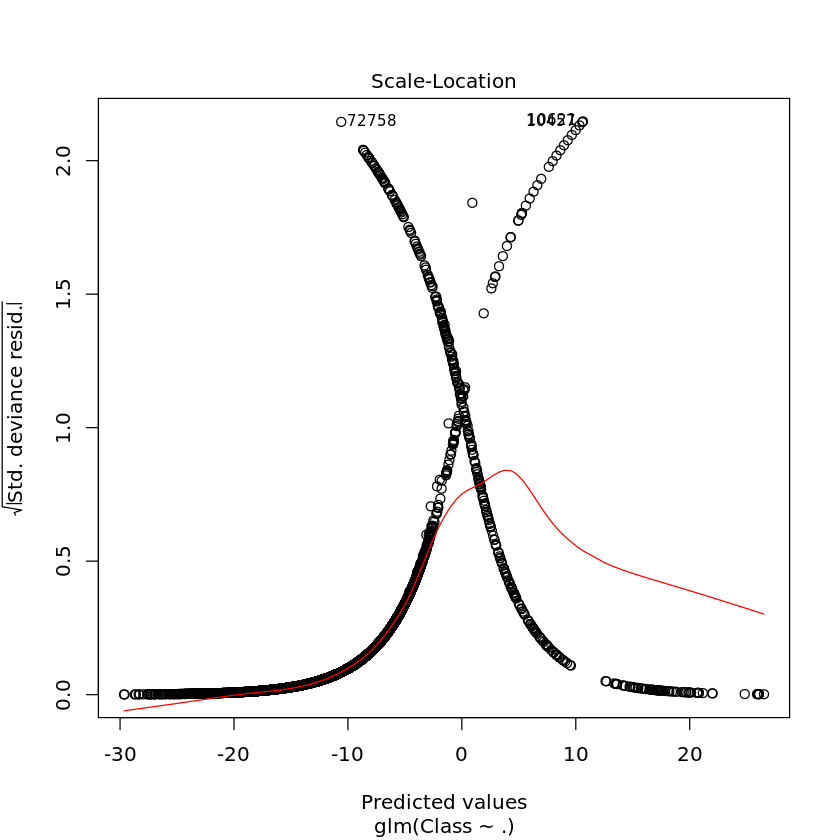

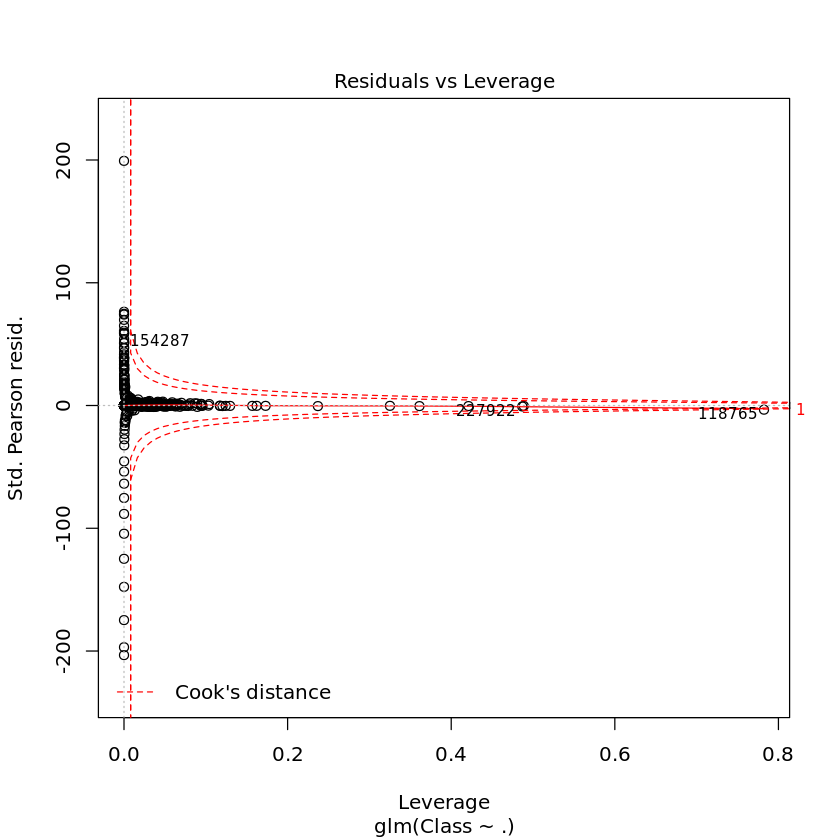

In [16]:
# Plot the logistic regression
plot(model)


### Task 8: Plot the Receiver Operating Characteristic Curve

Setting levels: control = 0, case = 1

Setting direction: controls < cases



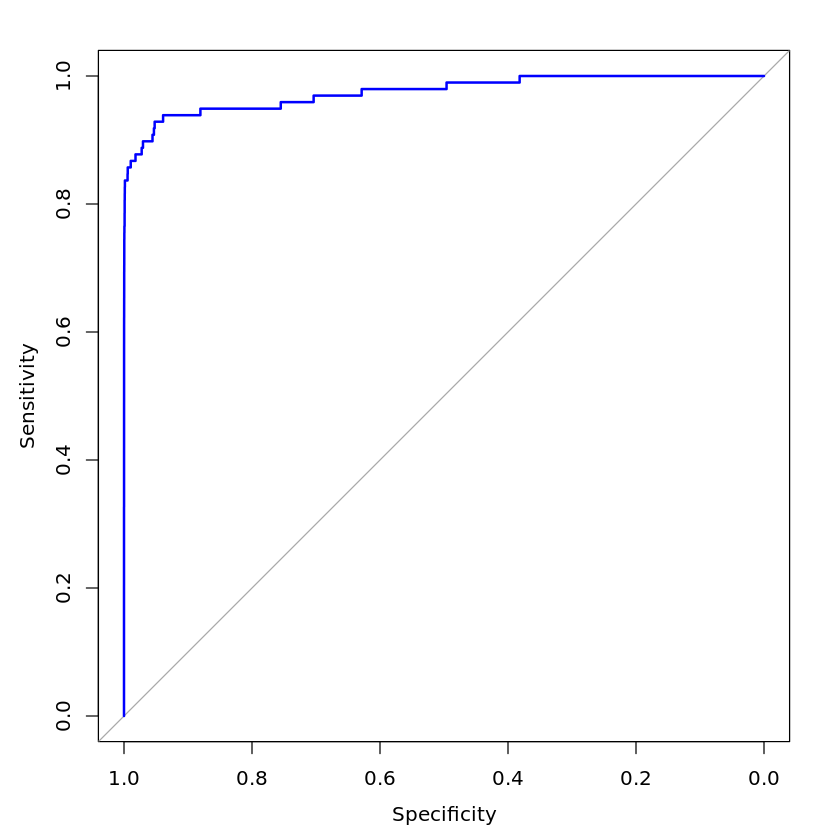

In [17]:
# Plot the curve
predicted_values = predict(model, data.test_data, probability =True)
auc_gbm = roc(data.test_data$Class, predicted_values, plot = TRUE, col = "blue")

## Decision Tree

### Task 9: Create and Fit the Decision Tree

In [19]:
decisionTree_model = rpart(Class~ . , data.train_data, method = 'class')


### Task 10: Calculate the Accuracy

In [20]:
# Get probability and predictions
predicted_val = predict(decisionTree_model, data.test_data, type = 'class')
probability = predict(decisionTree_model, data.test_data, type = 'prob')

In [21]:
# Create truth table
cf_matrix = table(data.test_data$Class,predicted_val)
print(cf_matrix)

   predicted_val
        0     1
  0 56845    18
  1    21    77


In [22]:
# Calulcate the accuracy
sum(diag(cf_matrix))/sum(cf_matrix) * 100

[1] 99.93153

### Task 11: Plot the Decision Tree

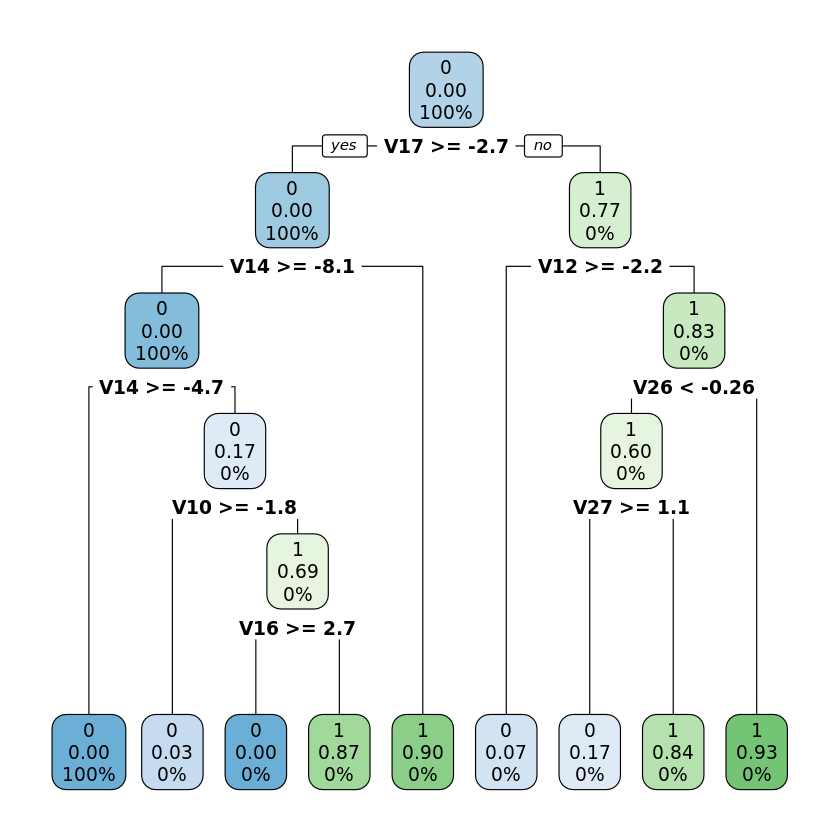

In [23]:
# Plot the decision Tree
library(rpart.plot)
rpart.plot(decisionTree_model)

## Neural Networks

### Task 12: Create and Fit the Neural Network

In [24]:
# Minimize the dataset
set.seed(123)
data_sample = sample.split(data.test_data$Class, SplitRatio=0.80)
data.train_data_sm = subset(data.test_data, data_sample==TRUE)
data.test_data_sm = subset(data.test_data, data_sample==FALSE)

In [25]:
# Fit the neural network
library(neuralnet)
nn = neuralnet(Class ~., data=data.train_data_sm, hidden=c(5,2), linear.output=FALSE, threshold=0.01)

In [26]:
# Get the results
nn.results = compute(nn, data.train_data_sm)
results = data.frame(actual = data.train_data_sm$Class, prediction = nn.results$net.result)

### Task 13: Calculate Accuracy

In [27]:
# Calculate Accuracy
roundedresults = sapply(results,round,digits=0)
roundedresultsdf = data.frame(roundedresults)
attach(roundedresultsdf)
confusion_matrix = table(actual,prediction)
sum(diag(confusion_matrix))/sum(confusion_matrix) * 100

[1] 99.96708

### Task 14: Plot the Comparison

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = data.test_data$Class, predictor = predicted_values,     plot = TRUE, col = "blue")

Data: predicted_values in 56863 controls (data.test_data$Class 0) < 98 cases (data.test_data$Class 1).
Area under the curve: 0.9748

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = data.test_data$Class, predictor = probability[,     2], plot = TRUE, col = "green")

Data: probability[, 2] in 56863 controls (data.test_data$Class 0) < 98 cases (data.test_data$Class 1).
Area under the curve: 0.9028

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = actual, predictor = prediction, plot = TRUE,     col = "red")

Data: prediction in 45490 controls (actual 0) < 78 cases (actual 1).
Area under the curve: 0.9486

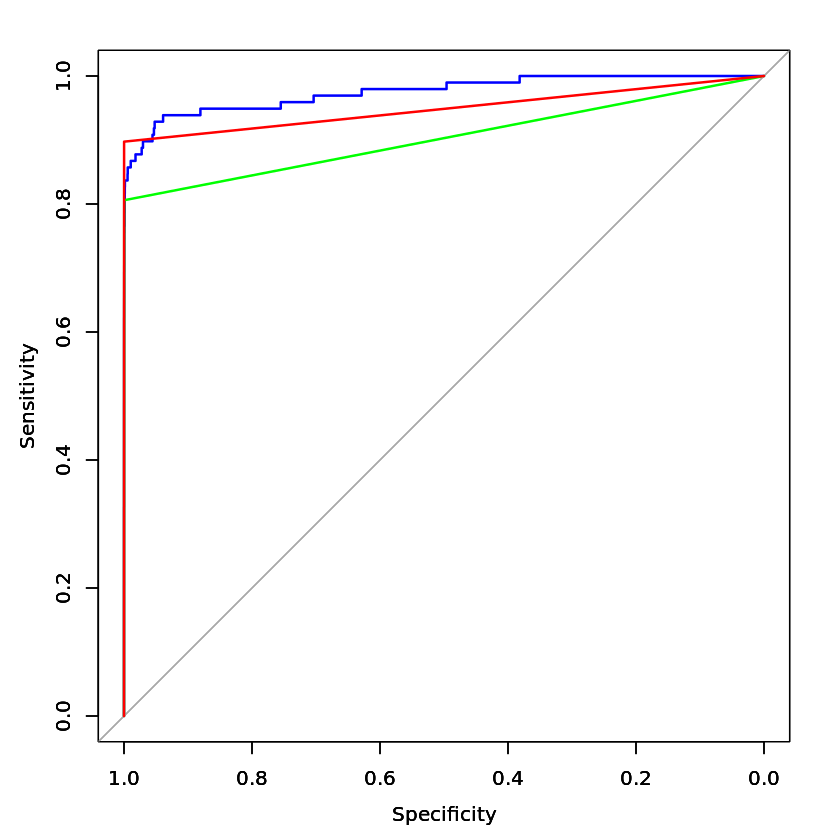

In [28]:
# Plot the comparative ROC curves
roc(data.test_data$Class, predicted_values, plot = TRUE, col = "blue")
par(new = TRUE)
roc(data.test_data$Class, probability[,2], plot = TRUE, col = "green")
par(new = TRUE)
roc(actual, prediction, plot = TRUE, col = "red")